In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

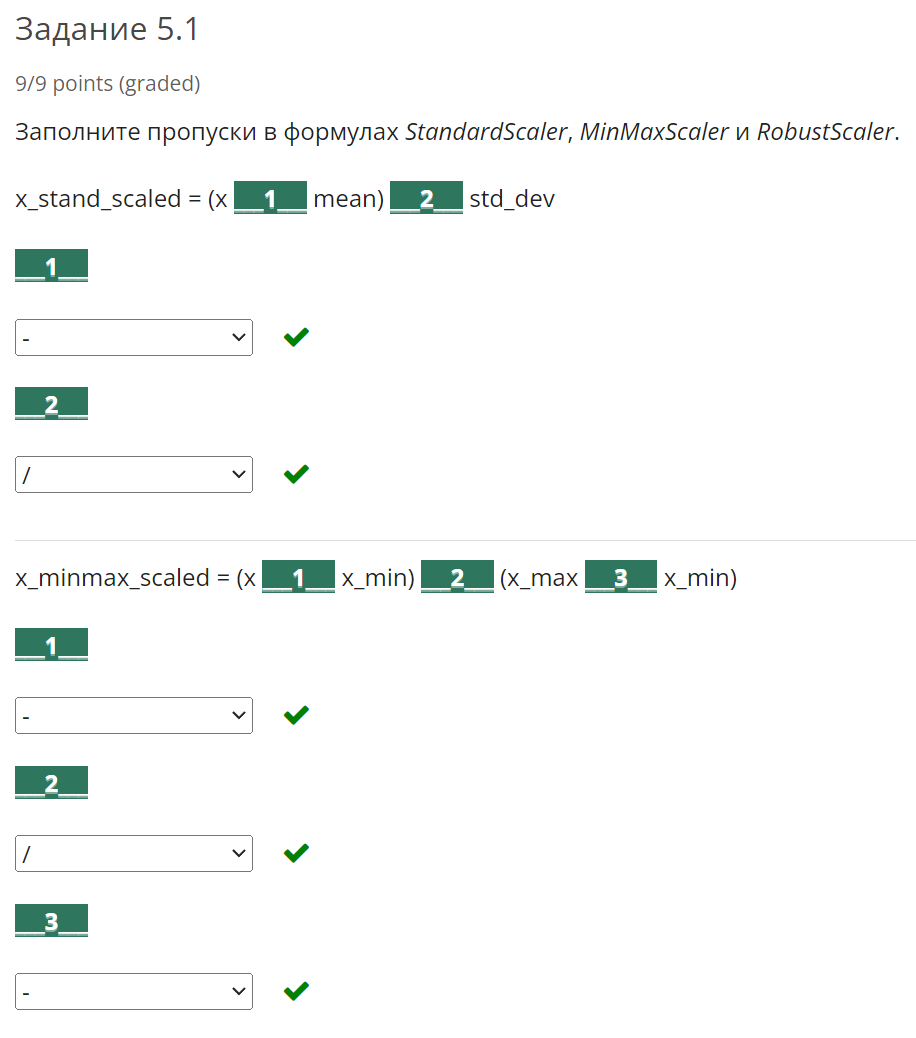
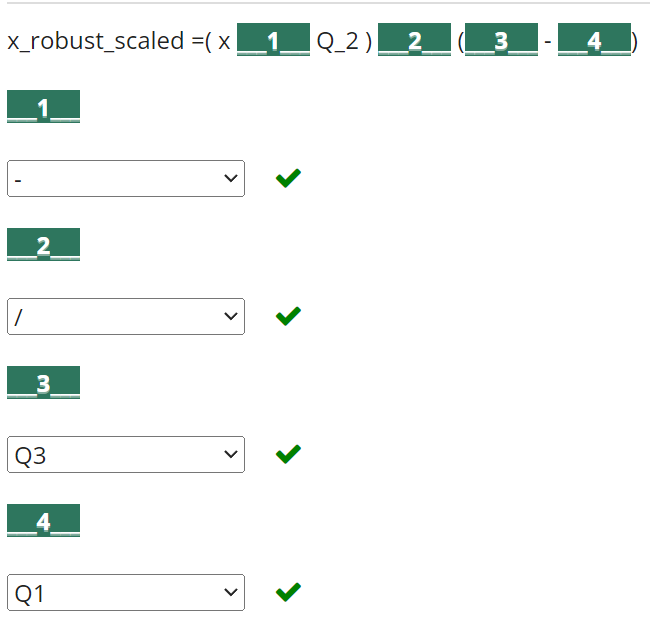

# Загрузка данных

In [3]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [4]:
data = pd.read_excel('data/data.xlsx') 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6837 entries, 0 to 6836
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  6837 non-null   int64
 1   price       6837 non-null   int64
 2   year        6837 non-null   int64
 3   weather     6837 non-null   int64
dtypes: int64(4)
memory usage: 213.8 KB


## Предобработка данных

Давайте посмотрим, как StandardScaler, MinMaxScaler и RobustScaler справятся с нашими данными. Для наглядности будем использовать три столбца.

In [5]:
data = data[['price', 'year', 'weather']]
data.dropna(inplace = True)

## Масштабирование

In [6]:
data_scaled = data.copy()
col_names = ['price', 'weather']
x = data_scaled[col_names]

In [7]:
scaler = StandardScaler()
 
data_scaled[col_names] = scaler.fit_transform(x.values)
data_scaled

,price,year,weather
0,2.558728,2016,0.862068
1,0.067373,2009,-0.017965
2,-1.072197,2002,-0.897998
3,-1.176990,2000,-0.395122
4,-0.677579,2003,-0.269403
...,...,...,...
6832,0.682100,2015,0.862068
6833,-0.767025,2005,-0.269403
6834,-0.414149,2006,0.862068
6835,-0.335138,2011,-0.646560


In [8]:
y = data_scaled['year']
x = data_scaled.drop(columns='year')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

MAE: 3.041


После применения двух других скейлеров получится следующая таблица MAE:

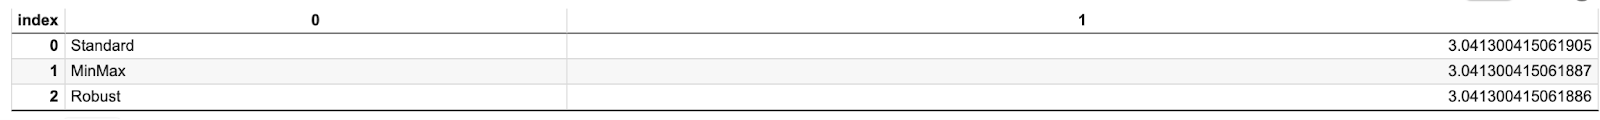

5.2 Отмасштабируйте признак price с помощью RobustScaler.
В качестве ответа запишите результат выполнения кода data['price'][1]. Ответ округлите до двух знаков после точки-разделителя.

In [10]:
from sklearn.preprocessing import RobustScaler


target = ['price', 'weather']
x = data_scaled[col_names]
scaler = RobustScaler()
scaled_data = scaler.fit_transform(x.values)
scaled_data

# хз как масштабировать по одному признаку

array([[ 1.98245503,  0.57142857],
       [ 0.1894604 ,  0.07142857],
       [-0.63067214, -0.42857143],
       ...,
       [-0.15708425,  0.57142857],
       [-0.10022089, -0.28571429],
       [ 0.34786999, -0.07142857]])

5.3 
Верно:

A Верно. StandardScaler используется, если признак распределён нормально. В иных случаях используется другой метод масштабированиия.

B Верно. 

У MinMaxScaler есть гиперпараметр feature_range, значение которого можно поменять на нужный диапазон.


In [11]:
data_scaled.to_excel('data/data.xlsx')